Name: Donal Devine

Student ID: 21248745

#### Formulate a particular question that might be interesting to answer by exploring this dataset

I guess the primary purpose of this dataset is to see if there are any features that will determine if a client will subscribe to a term deposit. For instance, does the fact that the client has a loan and/or a mortgage or if they have a low account balance affect the decision to open a term deposit account. Does the marital status or education level affect the outcome?


#### Calculate statistics for the numerical and categorical attributes

In [2]:
 # Use the same python modules that were used in the totorial

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Analysis of the fields

| Name 	| Description 	|
|---------------|---------------|
| age 			| age of the client |
| job 			| type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| marital 		| marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |
| education 	| education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
| default		| has credit in default? (categorical: 'no','yes','unknown') |
| housing		| has housing loan? (categorical: 'no','yes','unknown') |
| loan			| has personal loan? (categorical: 'no','yes','unknown') |
| contact		| contact communication type (categorical: 'cellular','telephone') |
| day 		    | last contact day of the month |
| month 		| last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| duration		| last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| campaign		| number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| pdays			| number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| previous		| number of contacts performed before this campaign and for this client (numeric) |
| poutcome		| outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |
| subscribed 	| has the client subscribed a term deposit? (binary: 'yes','no') |

#### Load the data

In [29]:
df = pd.read_csv('./bank.csv')

df_subscribed = df.loc[df['subscribed'] == 'yes']
df_not_subscribed = df.loc[df['subscribed'] == 'no']

# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

#### Examination of Numerical Attributes

In [5]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

<AxesSubplot:>

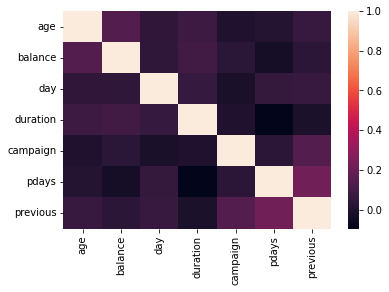

In [6]:
#correlation matrix
sns.heatmap(df.corr())

<AxesSubplot:>

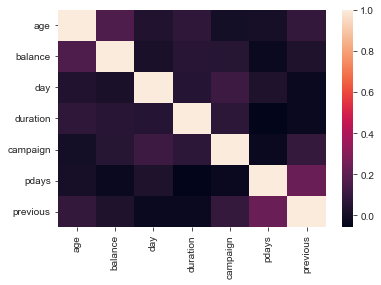

In [30]:
sns.heatmap(df_subscribed.corr())

<AxesSubplot:>

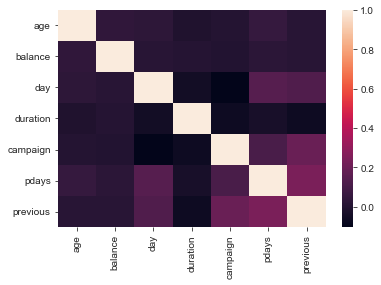

In [31]:
sns.heatmap(df_not_subscribed.corr())

##### Correlation analysis
There seems to be a small correlation between age and balance
However, the output is not there because it is not a numeric field.
Therefore I will dynamically add a new column to the data frame with 1 for yes and 0 for no.

age   balance       day  duration  campaign     pdays  \
age       1.000000  0.139874  0.042411  0.076732 -0.002876  0.009121   
balance   0.139874  1.000000  0.037078  0.096633  0.025103 -0.033014   
day       0.042411  0.037078  1.000000  0.058597 -0.019719  0.054188   
duration  0.076732  0.096633  0.058597  1.000000 -0.005188 -0.095650   
campaign -0.002876  0.025103 -0.019719 -0.005188  1.000000  0.030929   
pdays     0.009121 -0.033014  0.054188 -0.095650  0.030929  1.000000   
previous  0.063805  0.030292  0.063716 -0.015965  0.140995  0.218636   
subnum    0.085983  0.150395  0.153196  0.385209 -0.034457 -0.132887   

          previous    subnum  
age       0.063805  0.085983  
balance   0.030292  0.150395  
day       0.063716  0.153196  
duration -0.015965  0.385209  
campaign  0.140995 -0.034457  
pdays     0.218636 -0.132887  
previous  1.000000  0.058678  
subnum    0.058678  1.000000

<AxesSubplot:>

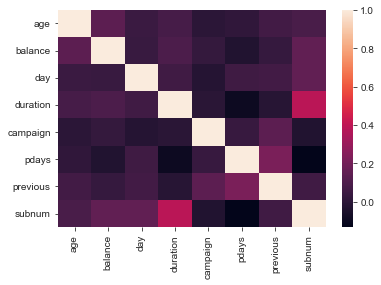

In [33]:
# add new field for numeric correlation with subscribed
subs_map = {'yes': 1, 'no': 0}
df['subnum'] = df['subscribed'].map(subs_map)

display(df.corr()) #bivariate plot

sns.heatmap(df.corr())

The above heatmap shows some correlation between the duration of the last contact and subscribed output. However, from reading the attibute information it suggests that the duration should be discarded if the intention is to have a realitic predictive model. I can also see a slight correlation between the balance and the subscribed output as well as a slight correlation between the day and the subscribed result. It is logical to assume that the balance might have a bearing on the result. The day correlation is probably just a coincidence.

#### Show stats for numeric fields

In [34]:
display(df.describe())

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous       subnum  
count  2000.000000  2000.000000  2000.000000  
mean    167.896000     2.561500     0.500000  
std     131.754126     3.400735     0.500125  
min      -1.000000     0.000000     0.000000  
25%      75.750000     1.000000     0.000000  
50%     182.000000     2.000000     0.500000  
75%     251.000000     3.000000     1.000000  
max     854.000000    55.000000     1.000000

##### Plot pairwise relationships

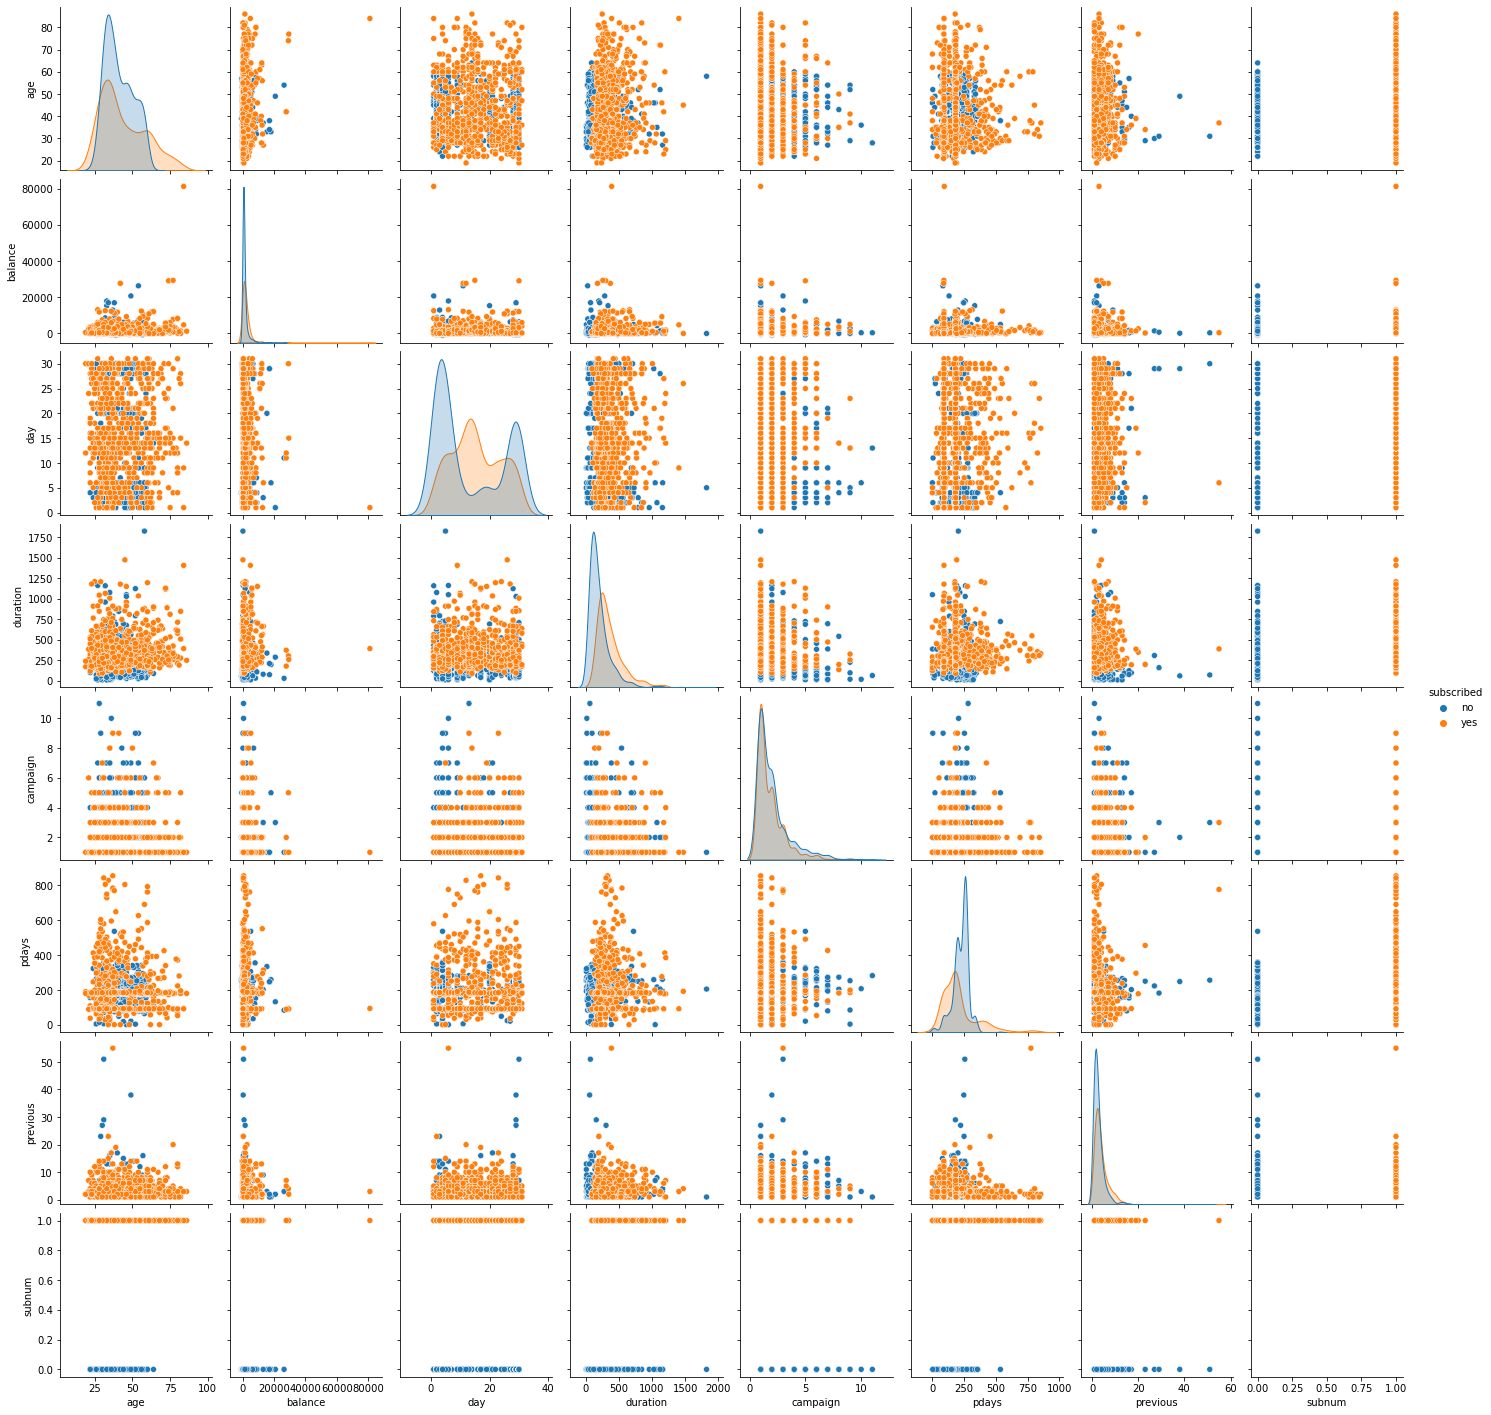

In [8]:
sns.pairplot(data=df.dropna(), hue='subscribed')
plt.show()

We can see that the age of the client played a part in the decision of the client to subscribe to a term deposit. There appears to be an even distribution between the ages, but there was more success iwth the older clients.  

##### Examining the categorical elements

In [9]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [35]:
df_subscribed['job'].value_counts()

management       251
technician       144
retired          136
admin.           130
student           87
blue-collar       77
services          50
unemployed        48
self-employed     35
housemaid         20
entrepreneur      15
Name: job, dtype: int64

In [36]:
df_not_subscribed['job'].value_counts() 

blue-collar      221
management       210
technician       204
admin.           117
services         115
entrepreneur      30
self-employed     29
retired           26
unemployed        21
housemaid         15
student            9
Name: job, dtype: int64

In [37]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [38]:
df_subscribed['marital'].value_counts()

married     501
single      405
divorced     94
Name: marital, dtype: int64

In [39]:
df_not_subscribed['marital'].value_counts()

married     610
single      269
divorced    121
Name: marital, dtype: int64

In [11]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [40]:
df_subscribed['education'].value_counts() 

secondary    451
tertiary     396
primary       84
Name: education, dtype: int64

In [41]:
df_not_subscribed['education'].value_counts() 

secondary    544
tertiary     288
primary      133
Name: education, dtype: int64

In [ ]:
sns.regplot(data=df, x='pdays', y='subnum', ax=ax1, color="g")
plt.show()

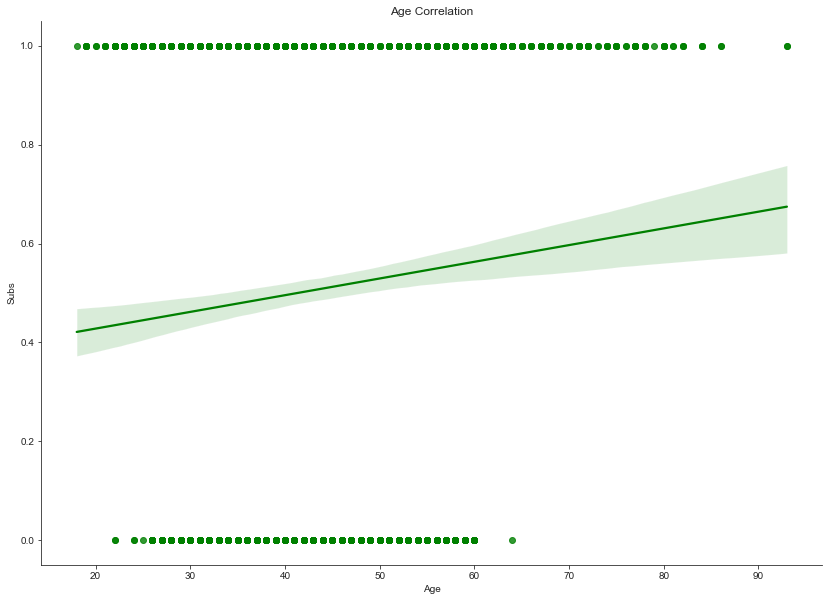

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.regplot(data=df, x='age', y='subnum', color="g", ax=ax).set(title='Age Correlation', xlabel = 'Age', ylabel = 'Subs')
sns.despine()


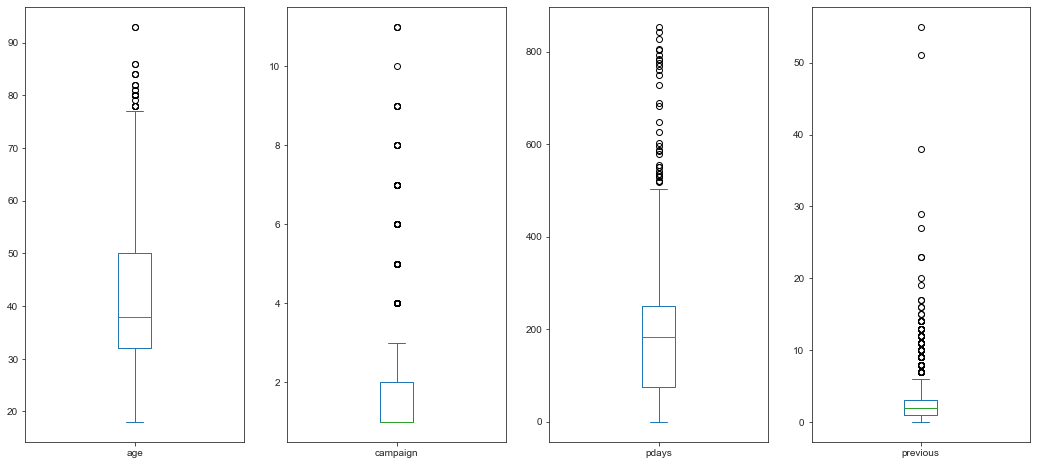

In [42]:
df[['age','campaign','pdays','previous']].plot(kind='box', subplots =True, sharex=False, sharey=False, figsize=(18,8))
plt.show()

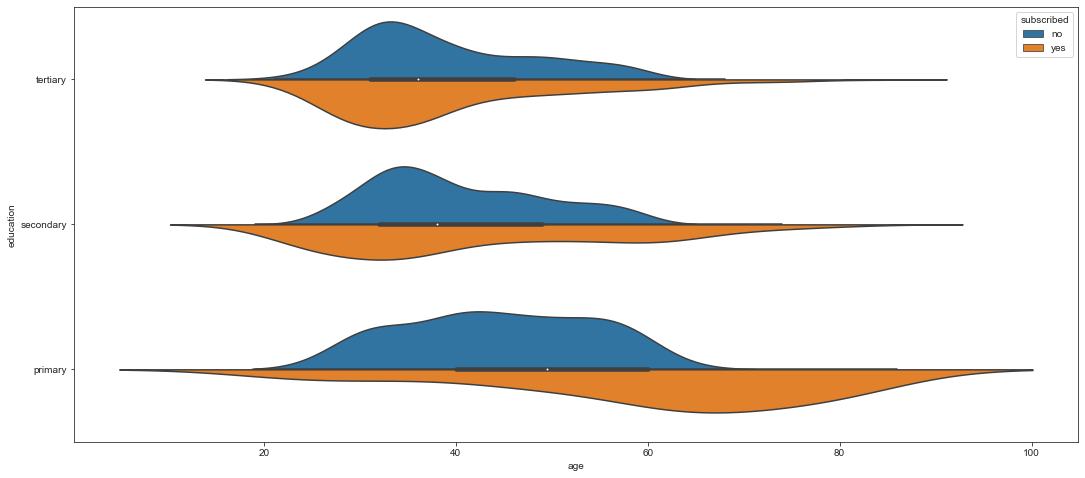

In [43]:
plt.figure(figsize=(18,8))
sns.violinplot(x=df['age'], y=df['education'], hue=df['subscribed'], split=True)
plt.show()


#### Conclusions

There does seem to be a correlation between the balance feature and the subscribed output. The output of the pairwise relationship between the balance and the subscribed output is also interesting. It shows that clients with a higher balance seem to be more likely to subscribe.  

The heatmap shows some correlation between the duration of the last contact and subscribed output. However, from reading the attribute information it suggests that the duration should be discarded if the intention is to have a realistic predictive model. I can also see a slight correlation between the day and the subscribed result, but the pairwise relationship does not indicate this is significant. 

From examination of the categorical attributes we can see that the job of the client is very important in determining whether they subscribe. For the subscribed data set the clients with managerial jobs were more likely to subscribe. In addition, clients with a higher level of education tended to subscribe and clients with a lower level of education did not. This conclusion is also shown more vividly in the violin plots.